### Imports

In [278]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Constructing a dataset

In [279]:
np.random.seed(42)

data_df = pd.DataFrame({
    'feature1': np.random.random((20)),
    'feature2': np.random.random((20)),
    'feature3': np.random.random((20))
})

target = np.random.randint(2, size=20)    

### Split into train and test sets

In [280]:
X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.3, random_state=42)

### Build ANN

In [281]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(3, )))
ANN_classifier.add(tf.keras.layers.Dense(units=8, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ANN_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics = ['accuracy'])
#ANN_classifier.summary()

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train our network

In [282]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs = 100, batch_size=4, validation_data=(X_test, y_test), verbose=0)

### Evaluate accuracy

In [283]:
loss, accuracy = ANN_classifier.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1667 - loss: 5.9465
Accuracy: 0.1666666716337204


###  Plotting the loss over epochs

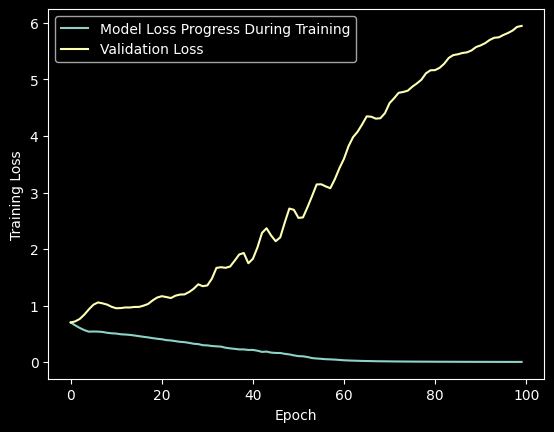

In [284]:
plt.plot(epochs_hist.history['loss'], label='Model Loss Progress During Training')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

## Demonstrating the problem of overfitting 

### Add noise and reduce the number of rows in the training set

In [285]:
overfit_data = data_df[:10] + np.random.normal(0, 0.1, (10, 3))
target_overfit = target[:10]

### Split into train and test sets

In [286]:
X_train_overfit, X_test_overfit, y_train_overfit, y_test_overfit = train_test_split(overfit_data, target_overfit, test_size=0.3, random_state=42)

### Build overfitted model

In [287]:
ANN_classifier_overfit = tf.keras.models.Sequential()
ANN_classifier_overfit.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(3, )))
ANN_classifier_overfit.add(tf.keras.layers.Dense(units=8, activation='relu'))
ANN_classifier_overfit.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ANN_classifier_overfit.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics = ['accuracy'])
epochs_hist_overfit = ANN_classifier_overfit.fit(X_train_overfit, y_train_overfit, epochs = 10, validation_data=(X_test_overfit, y_test_overfit), verbose=0)

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Evaluating overfitted model

In [288]:
loss_overfit, accuracy_overfit = ANN_classifier_overfit.evaluate(X_test_overfit, y_test_overfit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6667 - loss: 0.6787


### Plot overfitted model

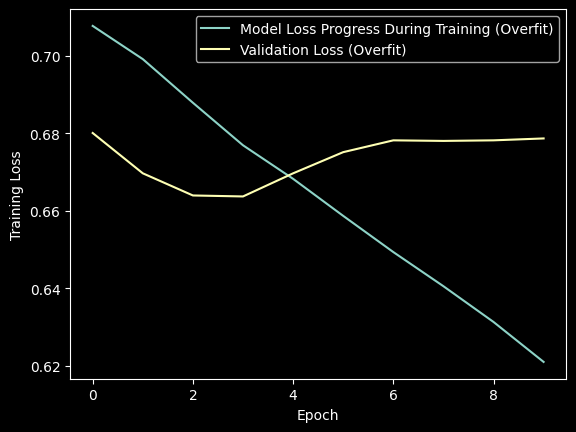

In [289]:
plt.plot(epochs_hist_overfit.history['loss'], label='Model Loss Progress During Training (Overfit)')
plt.plot(epochs_hist_overfit.history['val_loss'], label='Validation Loss (Overfit)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()